**Rozdział 10. Wprowadzenie do sztucznych sieci neuronowych z użyciem interfejsu Keras**

_Notatnik ten zawiera przykładowy kod i rozwiązania ćwiczeń opisane w rozdziale 10._

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Uruchom w Google Colab (wersja angielska)</a>
  </td>
</table>

# Konfiguracja

Importujmy najpierw kilka popularnych modułów, upewnijmy się, że będą wstawiane wykresy MatplotLib, a także przygotujmy funkcję zapisującą rysunki. Sprawdzimy także, czy jest zainstalowane środowisko Python 3.5 lub nowsze (możliwe, że kod będzie działał w środowisku Python 2.x, zostało ono jednak porzucone, dlatego zalecamy korzystanie ze środowiska Python 3), a także biblioteka Scikit-Learn 0.20 lub nowsza i TensorFlow 2.0 lub nowszy.

In [1]:
# Wymagane środowisko Python ≥3.5
import sys
assert sys.version_info >= (3, 5)

# Wymagana biblioteka Scikit-Learn ≥0.20
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version istnieje jedynie w środowisku Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# Wymagany moduł TensorFlow ≥2.0
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Importuje standardowe biblioteki
import numpy as np
import os

# Aby wyniki uzyskiwane w tym notatniku były odtwarzalne
np.random.seed(42)

# Do rysowania ładnych wykresów
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ścieżka zapisywania rysunków
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "R10"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "rysunki", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Zapisywanie rysunku", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignoruje niepotrzebne ostrzeżenia (sprawdź problem numer 5998 SciPy)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

TensorFlow 2.x selected.


# Perceptrony

**Uwaga**: jawnie wyznaczamy `max_iter` i `tol` po to, aby unikać ostrzeżeń informujących o zmianie wartości domyślnych tych parametrów w przyszłych wydaniach biblioteki Scikit-Learn.

In [0]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # długość płatka, szerokość płatka
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [3]:
y_pred

array([1])

Zapisywanie rysunku perceptron_zestaw_iris


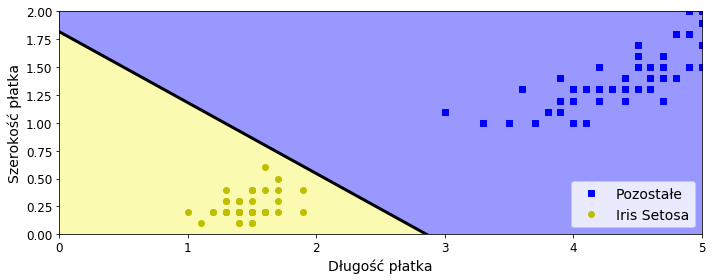

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Pozostałe")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Długość płatka", fontsize=14)
plt.ylabel("Szerokość płatka", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_zestaw_iris")
plt.show()

# Funkcje aktywacji

In [0]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Zapisywanie rysunku r_10_8


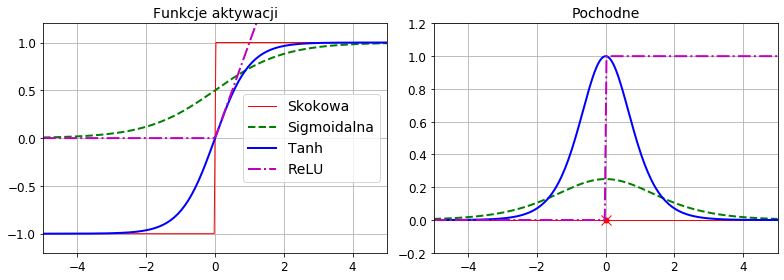

In [6]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Skokowa")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoidalna")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Funkcje aktywacji", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Skokowa")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoidalna")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Pochodne", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("r_10_8")
plt.show()

In [0]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

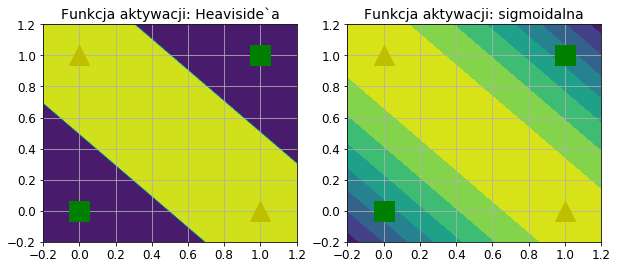

In [8]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Funkcja aktywacji: Heaviside`a", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Funkcja aktywacji: sigmoidalna", fontsize=14)
plt.grid(True)

# Tworzenie klasyfikatora obrazów

Importujmy najpierw moduł TensorFlow i interfejs Keras.

In [0]:
import tensorflow as tf
from tensorflow import keras

In [10]:
tf.__version__

'2.1.0'

In [11]:
keras.__version__

'2.2.4-tf'

Wczytajmy zestaw danych Fashion MNIST. Interfejs Keras zawiera wiele funkcji pozwalających na wczytywanie popularnych zestawów danych w `keras.datasets`. Interesujący nas zestaw danych jest już podzielony na zbiory uczący i testowy, ale warto jeszcze dodatkowo podzielić zestaw uczący tak, aby otrzymać zbiór walidacyjny:

In [12]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Zbiór uczący zawiera 60 000 czarno-białych obrazów o rozmiarze 28x28 pikseli:

In [13]:
X_train_full.shape

(60000, 28, 28)

Intensywność każdego piksela reprezentowana jest w postaci bajtowej (od 0 do 255):

In [14]:
X_train_full.dtype

dtype('uint8')

Podzielmy pełen zestaw uczący na zbiór walidacyjny i (mniejszy) zbiór uczący. Przeskalujemy również intensywności pikseli do zakresu od 0 do 1 i przekształcimy je do formatu zmiennoprzecinkowego (wystarczy podzielić je przez 255).

In [0]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Możesz stworzyć wykres obrazu za pomocą funkcji `imshow()` z biblioteki Matplotlib, przy użyciu mapy kolorów `'binary'`:

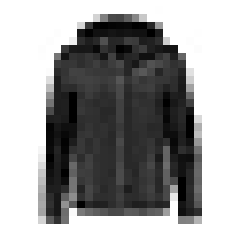

In [16]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

Etykiety są identyfikatorami klas (w formacie uint8) od 0 do 9:

In [17]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Wprowadzamy tu odpowiadające im nazwy klas:

In [0]:
class_names = ["Koszulka", "Spodnie", "Sweter", "Sukienka", "Płaszcz",
               "Sandał", "Koszula", "Tenisówka", "Torebka", "Trzewik"]

Zatem pierwszym obrazem w zbiorze uczącym jest płaszcz:

In [19]:
class_names[y_train[0]]

'Płaszcz'

Zbiór walidacyjny zawiera 5 000 obrazów, natomiast zbiór testowy - 10 000 przykładów:

In [20]:
X_valid.shape

(5000, 28, 28)

In [21]:
X_test.shape

(10000, 28, 28)

Przyjrzyjmy się grupie obrazów z zestawu danych:

Zapisywanie rysunku r_10_11


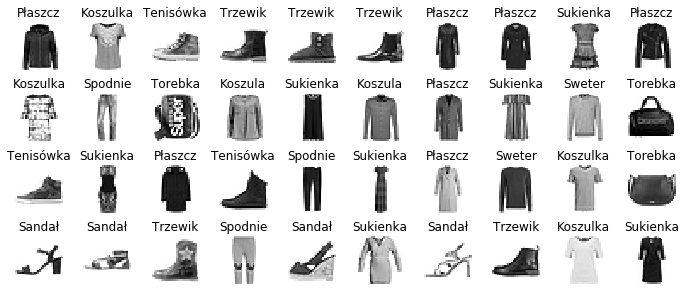

In [22]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('r_10_11', tight_layout=False)
plt.show()

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [0]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [26]:
model.layers

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


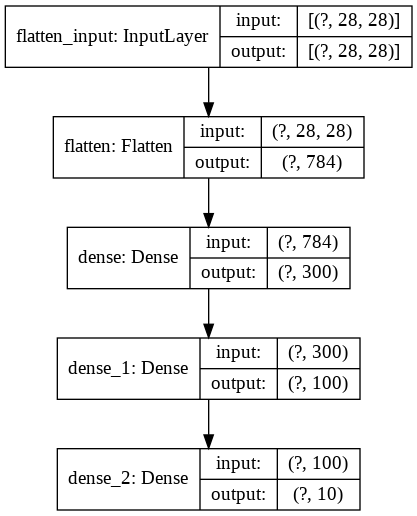

In [28]:
keras.utils.plot_model(model, "moj_model_fashion_mnist.png", show_shapes=True)

In [29]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [30]:
model.get_layer(hidden1.name) is hidden1

True

In [0]:
weights, biases = hidden1.get_weights()

In [32]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [33]:
weights.shape

(784, 300)

In [34]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [35]:
biases.shape

(300,)

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Jest to równoważne:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [37]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 8s 141us/sample - loss: 0.7226 - accuracy: 0.7640 - val_loss: 0.5076 - val_accuracy: 0.8314
Epoch 2/30
55000/55000 [==============================] - 6s 105us/sample - loss: 0.4843 - accuracy: 0.8323 - val_loss: 0.4540 - val_accuracy: 0.8484
Epoch 3/30
55000/55000 [==============================] - 6s 103us/sample - loss: 0.4414 - accuracy: 0.8465 - val_loss: 0.4382 - val_accuracy: 0.8496
Epoch 4/30
55000/55000 [==============================] - 6s 102us/sample - loss: 0.4130 - accuracy: 0.8547 - val_loss: 0.4158 - val_accuracy: 0.8564
Epoch 5/30
55000/55000 [==============================] - 6s 104us/sample - loss: 0.3928 - accuracy: 0.8613 - val_loss: 0.3812 - val_accuracy: 0.8644
Epoch 6/30
55000/55000 [==============================] - 6s 102us/sample - loss: 0.3772 - accuracy: 0.8665 - val_loss: 0.3728 - val_accuracy: 0.8692
Epoch 7/30
55000/55000 [===========================

In [38]:
history.params

{'batch_size': 32,
 'do_validation': True,
 'epochs': 30,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy'],
 'samples': 55000,
 'steps': 1719,
 'verbose': 0}

In [39]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [40]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Zapisywanie rysunku r_10_12


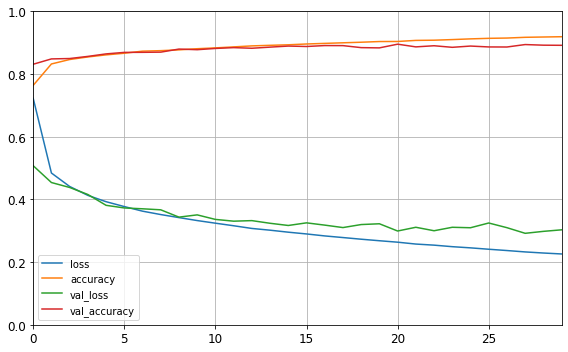

In [41]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("r_10_12")
plt.show()

In [42]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 76us/sample - loss: 0.3357 - accuracy: 0.8792


[0.3356892125844955, 0.8792]

In [43]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [44]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [45]:
np.array(class_names)[y_pred]

array(['Trzewik', 'Sweter', 'Spodnie'], dtype='<U9')

In [46]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Zapisywanie rysunku r_10_13


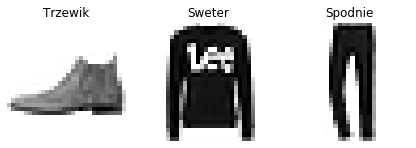

In [47]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('r_10_13', tight_layout=False)
plt.show()

# Regresyjny perceptron wielowarstwowy

Wczytajmy, podzielmy i przeskalujmy zestaw danych California Housing (oryginalny, a nie jego zmodyfikowaną wersję, której używaliśmy w rozdziale 2.):

In [48]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [0]:
np.random.seed(42)
tf.random.set_seed(42)

In [50]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 132us/sample - loss: 1.6205 - val_loss: 2.0374
Epoch 2/20
11610/11610 [==============================] - 1s 108us/sample - loss: 0.7162 - val_loss: 0.6571
Epoch 3/20
11610/11610 [==============================] - 1s 112us/sample - loss: 0.6356 - val_loss: 0.5996
Epoch 4/20
11610/11610 [==============================] - 1s 109us/sample - loss: 0.5989 - val_loss: 0.5662
Epoch 5/20
11610/11610 [==============================] - 1s 110us/sample - loss: 0.5713 - val_loss: 0.5489
Epoch 6/20
11610/11610 [==============================] - 1s 110us/sample - loss: 0.5491 - val_loss: 0.5204
Epoch 7/20
11610/11610 [==============================] - 1s 108us/sample - loss: 0.5301 - val_loss: 0.5018
Epoch 8/20
11610/11610 [==============================] - 1s 109us/sample - loss: 0.5142 - val_loss: 0.4815
Epoch 9/20
11610/11610 [==============================] - 1s 111us/sample - loss: 0.500

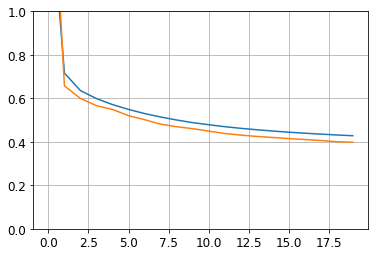

In [51]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [52]:
y_pred

array([[0.37310085],
       [1.679079  ],
       [3.0817142 ]], dtype=float32)

# Interfejs funkcyjny

Nie wszystkie modele sieci neuronowych są sekwencyjne. Niektóre cechuje skomplikowana topologia. Inne mogą mieć wiele wejść i/lub wyjść. Na przykład, sieć Wide & Deep (zobacz [artykuł](https://ai.google/research/pubs/pub45413)) łączy wszystkie lub niektóre wejścia bezpośrednio z warstwą wyjściową:

In [0]:
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [55]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

In [56]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 157us/sample - loss: 1.2390 - val_loss: 0.6566
Epoch 2/20
11610/11610 [==============================] - 1s 114us/sample - loss: 0.6312 - val_loss: 0.6734
Epoch 3/20
11610/11610 [==============================] - 1s 115us/sample - loss: 0.5886 - val_loss: 0.5574
Epoch 4/20
11610/11610 [==============================] - 1s 119us/sample - loss: 0.5595 - val_loss: 0.5235
Epoch 5/20
11610/11610 [==============================] - 1s 115us/sample - loss: 0.5361 - val_loss: 0.5011
Epoch 6/20
11610/11610 [==============================] - 1s 116us/sample - loss: 0.5178 - val_loss: 0.5065
Epoch 7/20
11610/11610 [==============================] - 1s 115us/sample - loss: 0.5016 - val_loss: 0.4699
Epoch 8/20
11610/11610 [==============================] - 1s 113us/sample - loss: 0.4888 - val_loss: 0.4745
Epoch 9/20
11610/11610 [==============================] - 1s 116us/sample - loss: 0.477

A gdybyśmy chcieli przesyłać osobne podzbiory cech wejściowych ścieżką krótką lub głęboką? Prześlemy pięć cech (od 0. do 4.) ścieżką krótką, a 6 (od 2. do 7.) ścieżką głęboką. Zwróć uwagę, że trzy cechy (2., 3. i 4.) będą przesyłane obydwiema ścieżkami.

In [0]:
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
input_A = keras.layers.Input(shape=[5], name="wejscie_krotkie")
input_B = keras.layers.Input(shape=[6], name="wejscie_glebokie")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="wyjscie")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [59]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 145us/sample - loss: 1.8127 - val_loss: 2.1165
Epoch 2/20
11610/11610 [==============================] - 1s 117us/sample - loss: 0.6852 - val_loss: 0.6178
Epoch 3/20
11610/11610 [==============================] - 1s 117us/sample - loss: 0.5965 - val_loss: 0.5600
Epoch 4/20
11610/11610 [==============================] - 1s 118us/sample - loss: 0.5587 - val_loss: 0.5269
Epoch 5/20
11610/11610 [==============================] - 1s 119us/sample - loss: 0.5321 - val_loss: 0.5185
Epoch 6/20
11610/11610 [==============================] - 1s 122us/sample - loss: 0.5129 - val_loss: 0.4803
Epoch 7/20
11610/11610 [==============================] - 1s 119us/sample - loss: 0.4959 - val_loss: 0.4689
Epoch 8/20
11610/11610 [==============================] - 1s 119us/sample - loss: 0.4837 - val_loss: 0.4498
Epoch 9/20
11610/11610 [==============================] - 1s 119us/sample - loss: 0.473

Wprowadzamy dodatkowe wyjście w celu regularyzacji:

In [0]:
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
input_A = keras.layers.Input(shape=[5], name="wejscie_krotkie")
input_B = keras.layers.Input(shape=[6], name="wejscie_glebokie")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="wyjscie_glowne")(concat)
aux_output = keras.layers.Dense(1, name="wyjscie_dodatkowe")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [0]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [63]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 207us/sample - loss: 2.1346 - wyjscie_glowne_loss: 1.9194 - wyjscie_dodatkowe_loss: 4.0632 - val_loss: 2.9120 - val_wyjscie_glowne_loss: 2.2555 - val_wyjscie_dodatkowe_loss: 8.8088
Epoch 2/20
11610/11610 [==============================] - 2s 161us/sample - loss: 0.8954 - wyjscie_glowne_loss: 0.7048 - wyjscie_dodatkowe_loss: 2.6119 - val_loss: 1.4135 - val_wyjscie_glowne_loss: 0.6348 - val_wyjscie_dodatkowe_loss: 8.4172
Epoch 3/20
11610/11610 [==============================] - 2s 162us/sample - loss: 0.7400 - wyjscie_glowne_loss: 0.6077 - wyjscie_dodatkowe_loss: 1.9305 - val_loss: 1.3594 - val_wyjscie_glowne_loss: 0.5885 - val_wyjscie_dodatkowe_loss: 8.2925
Epoch 4/20
11610/11610 [==============================] - 2s 161us/sample - loss: 0.6749 - wyjscie_glowne_loss: 0.5690 - wyjscie_dodatkowe_loss: 1.6264 - val_loss: 1.2789 - val_wyjscie_glowne_loss: 0.5611 - val_wyjscie_dodatk

In [64]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

5160/5160 [==============================] - 0s 86us/sample - loss: 0.4656 - wyjscie_glowne_loss: 0.4165 - wyjscie_dodatkowe_loss: 0.9111


# Interfejs podklasowy

In [0]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [66]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 2s 202us/sample - loss: 2.2719 - output_1_loss: 2.1554 - output_2_loss: 3.3117 - val_loss: 4.3377 - val_output_1_loss: 2.7732 - val_output_2_loss: 18.3999
Epoch 2/10
11610/11610 [==============================] - 2s 159us/sample - loss: 0.9891 - output_1_loss: 0.8653 - output_2_loss: 2.1062 - val_loss: 2.0073 - val_output_1_loss: 0.7581 - val_output_2_loss: 13.2427
Epoch 3/10
11610/11610 [==============================] - 2s 162us/sample - loss: 0.8320 - output_1_loss: 0.7303 - output_2_loss: 1.7468 - val_loss: 1.7215 - val_output_1_loss: 0.7114 - val_output_2_loss: 10.8051
Epoch 4/10
11610/11610 [==============================] - 2s 161us/sample - loss: 0.7658 - output_1_loss: 0.6760 - output_2_loss: 1.5726 - val_loss: 1.4708 - val_output_1_loss: 0.6454 - val_output_2_loss: 8.8938
Epoch 5/10
11610/11610 [==============================] - 2s 157us/sample - loss: 0.7223 - output_1_

In [0]:
model = WideAndDeepModel(30, activation="relu")

# Zapisywanie i wczytywanie

In [0]:
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [70]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 2s 139us/sample - loss: 1.8423 - val_loss: 5.2165
Epoch 2/10
11610/11610 [==============================] - 1s 113us/sample - loss: 0.6876 - val_loss: 0.7732
Epoch 3/10
11610/11610 [==============================] - 1s 113us/sample - loss: 0.5954 - val_loss: 0.5446
Epoch 4/10
11610/11610 [==============================] - 1s 116us/sample - loss: 0.5553 - val_loss: 0.5425
Epoch 5/10
11610/11610 [==============================] - 1s 112us/sample - loss: 0.5268 - val_loss: 0.5539
Epoch 6/10
11610/11610 [==============================] - 1s 113us/sample - loss: 0.5049 - val_loss: 0.4701
Epoch 7/10
11610/11610 [==============================] - 1s 116us/sample - loss: 0.4852 - val_loss: 0.4562
Epoch 8/10
11610/11610 [==============================] - 1s 112us/sample - loss: 0.4706 - val_loss: 0.4452
Epoch 9/10
11610/11610 [==============================] - 1s 123us/sample - loss: 0.457

In [0]:
model.save("moj_model_keras.h5")

In [0]:
model = keras.models.load_model("moj_model_keras.h5")

In [73]:
model.predict(X_new)

array([[0.55155903],
       [1.6555369 ],
       [3.0014236 ]], dtype=float32)

In [0]:
model.save_weights("moje_wagi_keras.ckpt")

In [75]:
model.load_weights("moje_wagi_keras.ckpt")

# Używanie wywołań zwrotnych w czasie uczenia

In [0]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [78]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("moj_model_keras.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("moj_model_keras.h5") # przywraca najlepszy model
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 2s 139us/sample - loss: 1.8423 - val_loss: 5.2165
Epoch 2/10
11610/11610 [==============================] - 1s 115us/sample - loss: 0.6876 - val_loss: 0.7732
Epoch 3/10
11610/11610 [==============================] - 1s 114us/sample - loss: 0.5954 - val_loss: 0.5446
Epoch 4/10
11610/11610 [==============================] - 1s 113us/sample - loss: 0.5553 - val_loss: 0.5425
Epoch 5/10
11610/11610 [==============================] - 1s 113us/sample - loss: 0.5268 - val_loss: 0.5539
Epoch 6/10
11610/11610 [==============================] - 1s 114us/sample - loss: 0.5049 - val_loss: 0.4701
Epoch 7/10
11610/11610 [==============================] - 1s 113us/sample - loss: 0.4852 - val_loss: 0.4562
Epoch 8/10
11610/11610 [==============================] - 1s 115us/sample - loss: 0.4706 - val_loss: 0.4452
Epoch 9/10
11610/11610 [==============================] - 1s 115us/sample - loss: 0.457

In [79]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 2s 137us/sample - loss: 0.4385 - val_loss: 0.4287
Epoch 2/100
11610/11610 [==============================] - 1s 116us/sample - loss: 0.4319 - val_loss: 0.4117
Epoch 3/100
11610/11610 [==============================] - 1s 114us/sample - loss: 0.4252 - val_loss: 0.3975
Epoch 4/100
11610/11610 [==============================] - 1s 113us/sample - loss: 0.4199 - val_loss: 0.3943
Epoch 5/100
11610/11610 [==============================] - 1s 113us/sample - loss: 0.4150 - val_loss: 0.3964
Epoch 6/100
11610/11610 [==============================] - 1s 115us/sample - loss: 0.4110 - val_loss: 0.3907
Epoch 7/100
11610/11610 [==============================] - 1s 114us/sample - loss: 0.4070 - val_loss: 0.3823
Epoch 8/100
11610/11610 [==============================] - 1s 115us/sample - loss: 0.4036 - val_loss: 0.3786
Epoch 9/100
11610/11610 [==============================] - 1s 115us/sample - lo

In [0]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nwalidacja/uczenie: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [81]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

Train on 11610 samples, validate on 3870 samples
11520/11610 [============================>.] - ETA: 0s - loss: 0.3265
walidacja/uczenie: 1.16
11610/11610 [==============================] - 1s 113us/sample - loss: 0.3256 - val_loss: 0.3789


# TensorBoard

In [0]:
root_logdir = os.path.join(os.curdir, "moje_dzienniki")

In [83]:
def get_run_logdir():
    import time
    run_id = time.strftime("przebieg_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./moje_dzienniki/przebieg_2020_02_23-20_44_55'

In [0]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [86]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 2s 200us/sample - loss: 1.8423 - val_loss: 5.2165
Epoch 2/30
11610/11610 [==============================] - 2s 155us/sample - loss: 0.6876 - val_loss: 0.7732
Epoch 3/30
11610/11610 [==============================] - 2s 153us/sample - loss: 0.5954 - val_loss: 0.5446
Epoch 4/30
11610/11610 [==============================] - 2s 152us/sample - loss: 0.5553 - val_loss: 0.5425
Epoch 5/30
11610/11610 [==============================] - 2s 153us/sample - loss: 0.5268 - val_loss: 0.5539
Epoch 6/30
11610/11610 [==============================] - 2s 152us/sample - loss: 0.5049 - val_loss: 0.4701
Epoch 7/30
11610/11610 [==============================] - 2s 153us/sample - loss: 0.4852 - val_loss: 0.4562
Epoch 8/30
11610/11610 [==============================] - 2s 160us/sample - loss: 0.4706 - val_loss: 0.4452
Epoch 9/30
11610/11610 [==============================] - 2s 158us/sample - loss: 0.457

Aby uruchomić serwer TensorBoard, może otworzyć terminal, w razie potrzeby uaktywnić środowisko wirtualnym, w którym zainstalowałeś narzędzie TensorBoard, przejść do katalogu tego notatnika i wpisać:

```bash
$ tensorboard --logdir=./moje_dzienniki --port=6006
```

Możesz następnie otworzyć w przeglądarce adres [localhost:6006](http://localhost:6006) i zacząć korzystać z serwera TensorBoard. Gdy już skończysz, wciśnij kombinację klawiszy Ctrl+C w oknie terminala, aby wyłączyć serwer TensorBoard.

Możesz ewentualnie wczytać rozszerzenie TensorBoard Jupyter i uruchomić je następująco:

In [0]:
%load_ext tensorboard
%tensorboard --logdir=./moje_dzienniki --port=6006

In [0]:
run_logdir2 = get_run_logdir()
run_logdir2

'./my_logs/run_2020_01_27-10_18_25'

In [0]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))

In [0]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 52us/sample - loss: 5.6341 - val_loss: 1.3205
Epoch 2/30
11610/11610 [==============================] - 0s 35us/sample - loss: 1.2704 - val_loss: 1.0757
Epoch 3/30
11610/11610 [==============================] - 0s 36us/sample - loss: 0.9370 - val_loss: 0.7769
Epoch 4/30
11610/11610 [==============================] - 0s 36us/sample - loss: 0.8854 - val_loss: 0.8254
Epoch 5/30
11610/11610 [==============================] - 0s 35us/sample - loss: 0.9501 - val_loss: 0.9415
Epoch 6/30
11610/11610 [==============================] - 0s 35us/sample - loss: 0.8283 - val_loss: 0.6111
Epoch 7/30
11610/11610 [==============================] - 0s 35us/sample - loss: 0.8095 - val_loss: 0.7394
Epoch 8/30
11610/11610 [==============================] - 0s 35us/sample - loss: 1.1857 - val_loss: 1.0356
Epoch 9/30
11610/11610 [==============================] - 0s 35us/sample - loss: 0.8920 - val_l

Serwer TensorBoard widzi teraz dwa porzebiegi i możesz porównać ich krzywe uczenia.

Dostępne są również inne opcje zapisywania zdarzeń:

In [0]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module tensorflow.python.keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, update_freq='epoch', profile_batch=2, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



# Strojenie hiperparametrów

In [0]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [0]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [0]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 0s 43us/sample - loss: 1.1399 - val_loss: 24.4309
Epoch 2/100
11610/11610 [==============================] - 0s 29us/sample - loss: 0.7393 - val_loss: 3.2896
Epoch 3/100
11610/11610 [==============================] - 0s 29us/sample - loss: 0.5374 - val_loss: 0.6080
Epoch 4/100
11610/11610 [==============================] - 0s 28us/sample - loss: 0.4796 - val_loss: 0.4532
Epoch 5/100
11610/11610 [==============================] - 0s 29us/sample - loss: 0.4536 - val_loss: 0.4221
Epoch 6/100
11610/11610 [==============================] - 0s 29us/sample - loss: 0.4373 - val_loss: 0.4144
Epoch 7/100
11610/11610 [==============================] - 0s 29us/sample - loss: 0.4256 - val_loss: 0.4025
Epoch 8/100
11610/11610 [==============================] - 0s 28us/sample - loss: 0.4178 - val_loss: 0.3938
Epoch 9/100
11610/11610 [==============================] - 0s 29us/sample - loss: 0.41

In [0]:
mse_test = keras_reg.score(X_test, y_test)

5160/5160 [==============================] - 0s 14us/sample - loss: 0.3464


In [0]:
y_pred = keras_reg.predict(X_new)

In [0]:
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
  32/7740 [..............................] - ETA: 30s - loss: 6.7379

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


7740/7740 [==============================] - 0s 53us/sample - loss: 3.5574 - val_loss: 1.8536
Epoch 2/100
7740/7740 [==============================] - 0s 30us/sample - loss: 1.3316 - val_loss: 0.9380
Epoch 3/100
7740/7740 [==============================] - 0s 30us/sample - loss: 0.8573 - val_loss: 0.8545
Epoch 4/100
7740/7740 [==============================] - 0s 30us/sample - loss: 0.7344 - val_loss: 0.9545
Epoch 5/100
7740/7740 [==============================] - 0s 30us/sample - loss: 0.6943 - val_loss: 0.7248
Epoch 6/100
7740/7740 [==============================] - 0s 30us/sample - loss: 0.6682 - val_loss: 0.7356
Epoch 7/100
7740/7740 [==============================] - 0s 31us/sample - loss: 0.6494 - val_loss: 0.9732
Epoch 8/100
7740/7740 [==============================] - 0s 30us/sample - loss: 0.6408 - val_loss: 0.6175
Epoch 9/100
7740/7740 [==============================] - 0s 30us/sample - loss: 0.6256 - val_loss: 0.5877
Epoch 10/100
7740/7740 [==============================] - 

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7ff3841c6be0>,
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff384301f60>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,...
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_trai

In [0]:
rnd_search_cv.best_params_

{'learning_rate': 0.0033625641252688094, 'n_hidden': 2, 'n_neurons': 42}

In [0]:
rnd_search_cv.best_score_

-0.35952892616378346

In [0]:
rnd_search_cv.best_estimator_

In [0]:
rnd_search_cv.score(X_test, y_test)

5160/5160 [==============================] - 0s 15us/sample - loss: 0.3065


-0.30652404945026074

In [0]:
model = rnd_search_cv.best_estimator_.model
model

In [0]:
model.evaluate(X_test, y_test)

5160/5160 [==============================] - 0s 15us/sample - loss: 0.3065


0.30652404945026074

# Rozwiązania ćwiczeń

## 1. do 9.

Zobacz dodatek A.

## 10.

*Ćwiczenie: 10.	Wytrenuj głęboki perceptron wielowarstwowy na zestawie danych MNIST (możesz go wczytać za pomocą funkcji `keras.data sets.mnist.load_data()`). Spróbuj uzyskać precyzję przekraczającą 98%. Postaraj się wyszukać optymalny współczynnik uczenia za pomocą techniki opisanej w niniejszym rozdziale (tj. wykładnicze zwiększanie wartości współczynnika uczenia w każdej iteracji, stworzenie wykresu funkcji straty i znalezienie punktu, w którym wartość tej funkcji zaczyna rosnąć). Spróbuj dodać inne funkcje, takie jak zapisywanie punktów kontrolnych, wczesne zatrzymywanie czy generowanie wykresów krzywych uczenia przy użyciu narzędzia TensorBoard.*

Wczytajmy zestaw danych:

In [0]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

Podobnie jak w przypadku zestawu Fashion MNIST, zbiór uczący MNIST składa się z 60 000 czarno-białych obrazów o rozmiarze 28x28 pikseli:

In [0]:
X_train_full.shape

(60000, 28, 28)

Również turaj intensywność każdego piksela jest reprentowanie w formie bajtowej (od 0 do 255):

In [0]:
X_train_full.dtype

dtype('uint8')

Podzielmy pełny zestaw uczący na zbiór walidacyjny i (mniejszy) zbiór uczący. Tak jak w przypadku zestawu Fashion MNIST, przeskalujemy tu intensywności pikseli do zakresu od 0 do 1 i przekształcimy je w wartości zmiennoprzecinkowe (podzielimy je przez 255):

In [0]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Stwórzmy wykres obrazu za pomocą funkcji `imshow()` i mapy kolorów `'binary'`:

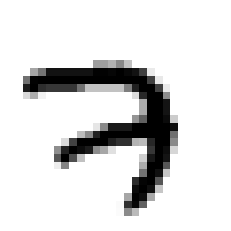

In [0]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

Etukiety są identyfikatorami klas (reprezentowanymi w formacie uint8) od 0 do 9. Na szczęście identyfikatory klas odpowiadają cyfrom widocznym na obrazach, dlatego nie potrzebujemy tablicy `class_names`:

In [0]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

Zbiór walidacyjny zawiera 5 000 obrazów, a zbiór testowy składa się 10 000 przykładów:

In [0]:
X_valid.shape

(5000, 28, 28)

In [0]:
X_test.shape

(10000, 28, 28)

Spójrzmy na przykładową grupę obrazów z tego zestawu danych:

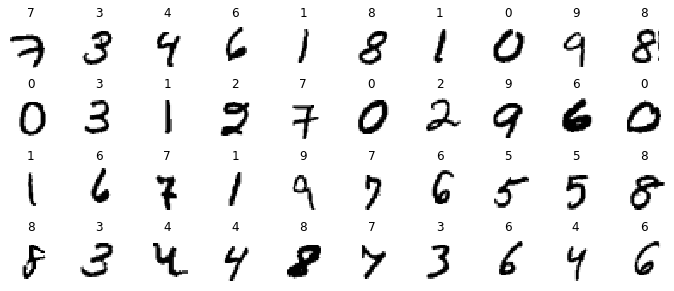

In [0]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Zbudujmy prostą sieć gęstą i określmy jej optymalny współczynnik uczenia. Będziemy potrzebować wywołania zwrotnego zwiększającego wartość współczynnika uczenia w każdej iteracji. Będziemy także rejestroować wartość współczynnika uczenia i funkcji straty w każdej iteracji:

In [0]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [0]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

Zaczniemy od małej wartości współczynnika uczenia, rzędu 1e-3, i będzie zwiększać ją o 0.5% w każdej iteracji:

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

Wytrenujmy teraz model tylko przez jedną epokę:

In [0]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

Train on 55000 samples, validate on 5000 samples
55000/55000 [==============================] - 3s 52us/sample - loss: 55143288500710.3281 - accuracy: 0.5734 - val_loss: 2.3660 - val_accuracy: 0.1100


Możemy teraz stworzyć wykres funkcji straty od współczynnika uczenia:

Text(0, 0.5, 'Loss')

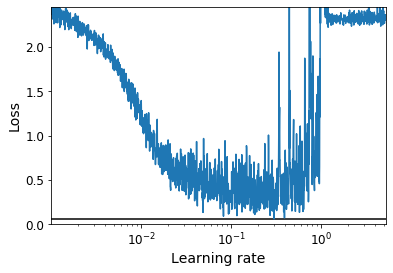

In [0]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.xlabel("Współczynnik uczenia")
plt.ylabel("Funkcja straty")

Funkcja straty zaczyna mocno wariować w okolicachg wartości 3e-1 współczynnika uczenia, dlatego zwiększmy ją do 2e-1:

In [0]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=2e-1),
              metrics=["accuracy"])

In [0]:
run_index = 1 # zwiększa tę wartość w każdym przebiegu
run_logdir = os.path.join(os.curdir, "moje_dzienniki_mnist", "przebieg_{:03d}".format(run_index))
run_logdir

'./my_mnist_logs/run_001'

In [0]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("moj_model_mnist.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb, checkpoint_cb, tensorboard_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 3s 46us/sample - loss: 0.2361 - accuracy: 0.9280 - val_loss: 0.1183 - val_accuracy: 0.9664
Epoch 2/100
55000/55000 [==============================] - 2s 42us/sample - loss: 0.0954 - accuracy: 0.9705 - val_loss: 0.0855 - val_accuracy: 0.9768
Epoch 3/100
55000/55000 [==============================] - 2s 42us/sample - loss: 0.0642 - accuracy: 0.9796 - val_loss: 0.0822 - val_accuracy: 0.9786
Epoch 4/100
55000/55000 [==============================] - 2s 42us/sample - loss: 0.0462 - accuracy: 0.9855 - val_loss: 0.0804 - val_accuracy: 0.9770
Epoch 5/100
55000/55000 [==============================] - 2s 42us/sample - loss: 0.0333 - accuracy: 0.9894 - val_loss: 0.1907 - val_accuracy: 0.9500
Epoch 6/100
55000/55000 [==============================] - 2s 41us/sample - loss: 0.0244 - accuracy: 0.9919 - val_loss: 0.0698 - val_accuracy: 0.9828
Epoch 7/100
55000/55000 [==========================

In [0]:
model = keras.models.load_model("moj_model_mnist.h5") # wraca do najlepszego modelu
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 26us/sample - loss: 0.0692 - accuracy: 0.9806


[0.06917384602149541, 0.9806]

Osiągnęliśmy dokładność ponad 98%. Nareszcie. Sprawdźmy krzywe uczenia za pomocą narzędzia TensorBoard:

In [0]:
%tensorboard --logdir=./moje_dzienniki_mnist --port=6006